In [ ]:
### Install KerasNLP

!pip install -q keras-nlp

In [ ]:
# Import libraries
import keras_nlp
import tensorflow as tf
from tensorflow import keras
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

directory='/content' ### Set Directory

In [ ]:
%%bash
# Script to make sure data files can be used

directory='/content' ### Must be the same as the variable directory

if [ ! -d $directory ]; then
mkdir -p $directory
fi

cd $directory
wget https://storage.googleapis.com/yantk-siads-699/699_final.tar.gz
tar -xvzf ${directory}/699_final.tar.gz .
mkdir ${directory}/699
mkdir ${directory}/699/699
mv ${directory}/Data\ 20230612 ${directory}/699/699
mv ${directory}/model ${directory}/699/699

In [ ]:
### Load training set and test set
train_df = pd.read_csv(directory + '/699/699/Data 20230612/Youtube/train_set_youtube.csv',  lineterminator='\n')
test_df = pd.read_csv(directory + '/699/699/Data 20230612/Youtube/test_set_youtube.csv',  lineterminator='\n')
val_df = pd.read_csv(directory + '/699/699/Data 20230612/Youtube/validation_set_youtube.csv',  lineterminator='\n')
train_df

,Unnamed: 0,video_id,title,description,en_tag_list,top_tags
0,43400,QtnQG0fDMTk,What did these footballers get for Christmas? ...,It's the Onefootball and 442oons Christmas spe...,"['442oons', 'onefootball', '442oons cartoon', ...","['442oons', 'onefootball', '442oons cartoon', ..."
1,43598,TI-WuvgURFo,MANCHESTER UNITED vs MAN CITY With Mark GOLDBR...,Manchester United 0-2 Man City Match Reaction ...,"['manchester united', 'man united', 'man utd',...","['manchester united', 'man united', 'man utd',..."
2,27041,f6YDKF0LVWw,NAYEON POP! M/V,NAYEON POP! M/VNAYEON The 1st Mini Album IM NA...,"['twice', 'twicenayeon', 'nayeon', 'imnayeon',...","['twice', 'twicenayeon', 'nayeon', 'imnayeon',..."
3,46699,Kr670q3ITdU,"Foden's Skill, Water Balloon Fight, Unreal Goa...",Recap the best highlights from camp during the...,"['england', 'england training', 'england behin...","['england', 'england training', 'england euro ..."
4,49398,8MHGFEHt97k,FIRST TIME TRIPPING BALLS #shorts,FIRST TIME TRIPPING BALLS #shorts,['minecraft'],['minecraft']
...,...,...,...,...,...,...
43984,17672,7lvw1-ltYpQ,Alex Caruso On What Exactly Happened In Free A...,Alex Caruso joins JJ Redick and Tommy Alter th...,"['jj redick', 'jj redick podcast', 'jj redick ...","['jj redick', 'jj redick podcast', 'jj redick ..."
43985,10936,HNZRaeTpmJw,"Say So, Streets & Kiss Me More (Medley) (Live ...","Music video by Doja Cat performing Say So, Str...","['say so', 'doja cat']","['say so', 'doja cat']"
43986,24999,Ltn3x5dUIE8,Using OP ITEMS to CLUTCH in Minecraft Bedwars...,Using OP ITEMS to CLUTCH in Minecraft Bedwars....,"['wallibear bedwars', 'wallibear texture pack'...","['wallibear bedwars', 'wallibear texture pack'..."
43987,40429,v5B9mkcsh9g,Diablo 4 - Before You Buy,"Diablo IV (PC, PS5, PS4, Xbox Series X/S/One) ...","['diablo 4', 'diablo iv review', 'd4 review', ...","['diablo 4', 'diablo iv review', 'diablo 4 gam..."


In [ ]:
# Preprocess dataset to have a column combining Title and Description for prediction
def combine(df):
  df["description"] = df["description"].astype(str)
  df["title"] = df["title"].astype(str)
  df["combined"] = df["title"] + '' + df["description"]
  return df

combine(test_df)
combine(train_df)
combine(val_df)
train_df.sample(5)

,Unnamed: 0,video_id,title,description,en_tag_list,top_tags,combined
622,33293,07hsXIJ138s,MEETING MY ONLINE FRIEND IN SINGAPORE FOR THE ...,HELLO AXOLOTStoday we venture back to Singapor...,"['vlog', 'travel', 'airplane', 'airport', 'sin...","['vlog', 'travel', 'airplane', 'airport', 'sin...",MEETING MY ONLINE FRIEND IN SINGAPORE FOR THE ...
28302,38537,rvX6MyVkGKI,Hundreds of teenagers flood into downtown Chic...,Hundreds of teenagers flooded into Downtown Ch...,"['news', 'illinois', 'chicago', 'millennium pa...","['news', 'illinois', 'chicago', 'millennium pa...",Hundreds of teenagers flood into downtown Chic...
3301,24692,HAC8-ZScm9g,I hatched HUNDREDS of LEGENDARY EASTER EGGS to...,Hatching HUNDREDS of LEGENDARY EASTER EGGS to ...,"['roblox simulator', 'roblox simulator games',...","['roblox simulator', 'roblox simulator games',...",I hatched HUNDREDS of LEGENDARY EASTER EGGS to...
18928,4876,YZNearcOsXg,AirPods Max — Journey into Sound,Introducing AirPods Max. Computational audio. ...,"['apple', 'airpods', 'airpods max', 'airpod ma...","['apple', 'airpods', 'airpods max', 'airpod ma...",AirPods Max — Journey into SoundIntroducing Ai...
18197,62880,mpvXh6FtobU,SURPRISING MY BOYFRIEND ! HE’S HOME FROM OVERS...,SHOP https://www.excusemybeautyco.com/ SUBSCRI...,"['nique', 'vlogs', 'beauty', 'excuse my beauty...","['vlogs', 'beauty', 'my', 'makeup', 'hair', 'n...",SURPRISING MY BOYFRIEND ! HE’S HOME FROM OVERS...


In [ ]:
test_df.combined

0       love.Provided to YouTube by Universal Music Gr...
1       Pope & Root Masterclass! | Highlights | Englan...
2       telling you the truth.this is the truth. ☂️ Sh...
3       Basketball Mood Lifters! Part 7! 😆 #shortsBask...
4       BRYNLEY IS PREGNANT!BRYNLEY IS PREGNANT!Subscr...
                              ...                        
5494    Macron à Poutine : Tu te racontes des histoire...
5495    Soolking feat. Lynda, Heuss, L'Algérino, Frang...
5496    Trump delivers acceptance speech at the RNC | ...
5497    Ryan Whitney & Paul Bissonnette Went Head To H...
5498    BTS (방탄소년단) 'Butter (feat. Megan Thee Stallion...
Name: combined, Length: 5499, dtype: object

In [ ]:
# Define a function for prompt engineering
# Create prompts to instruct GPT2 to follow this pattern

def preprocessing(combined):
  example_output = """['first we feast', 'fwf', ..., 'bartender']"""
  res_prompt = f"""You are a tags generator for a video.
  Example output format: {example_output}
  Generate 10 tags for a video:
  Video Description: {combined}
  Output:"""
  return res_prompt

def prompt_length(input):
  words = input.split(" ")
  return len(words)


Preprocess dataset for Prompt Creation

In [ ]:
test_df.combined.apply(preprocessing)

0       You are a tags generator for a video.\n  Examp...
1       You are a tags generator for a video.\n  Examp...
2       You are a tags generator for a video.\n  Examp...
3       You are a tags generator for a video.\n  Examp...
4       You are a tags generator for a video.\n  Examp...
                              ...                        
5494    You are a tags generator for a video.\n  Examp...
5495    You are a tags generator for a video.\n  Examp...
5496    You are a tags generator for a video.\n  Examp...
5497    You are a tags generator for a video.\n  Examp...
5498    You are a tags generator for a video.\n  Examp...
Name: combined, Length: 5499, dtype: object

In [ ]:
val_df.combined.apply(preprocessing) + " " + val_df['top_tags'].astype(str)

0       You are a tags generator for a video.\n  Examp...
1       You are a tags generator for a video.\n  Examp...
2       You are a tags generator for a video.\n  Examp...
3       You are a tags generator for a video.\n  Examp...
4       You are a tags generator for a video.\n  Examp...
                              ...                        
5494    You are a tags generator for a video.\n  Examp...
5495    You are a tags generator for a video.\n  Examp...
5496    You are a tags generator for a video.\n  Examp...
5497    You are a tags generator for a video.\n  Examp...
5498    You are a tags generator for a video.\n  Examp...
Length: 5499, dtype: object

In [ ]:
train_df.combined.apply(preprocessing)[0]

"You are a tags generator for a video.\n  Example output format: ['first we feast', 'fwf', ..., 'bartender']\n  Generate 10 tags for a video:\n  Video Description: What did these footballers get for Christmas? ► 442oons Xmas Special!It's the Onefootball and 442oons Christmas special! Kylian Mbappe, Jose Mourinho, Cristiano Ronaldo and many more footballers open their secret santa Christmas presents, but what did they get and who were they from?#442oons #cartoon #ronaldo► Liked the video? Let us know by subscribing to our channel: http://bit.ly/SubscribeToOnefootball► Liked it a lot? Download our app: http://bit.ly/2GeDHEKOneFootball is the world's most comprehensive football app and is available free on iOS, Android and Windows Phone!► Check our website: https://www.onefootball.com/en► Like us on Facebook: http://bit.ly/1YpT8ud► Follow us on Twitter: http://bit.ly/2lDcoK8► Follow us on Instagram: http://bit.ly/1U7uYQh► Listen to the Onefootball podcast: http://bit.ly/2617W55Photo credi

In [ ]:
### Load a pre-trained GPT-2 model
### Reference: https://keras.io/examples/generative/gpt2_text_generation_with_kerasnlp/#load-a-pretrained-gpt2-model-and-generate-some-text

preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(
    "gpt2_medium_en",
    sequence_length=256,
)
tuned_gpt2 = keras_nlp.models.GPT2CausalLM.from_preset(
    "gpt2_medium_en", preprocessor=preprocessor
)
tuned_gpt2.compile(sampler="top_k")

In [ ]:
### Generate some text
### Reference: https://keras.io/examples/generative/gpt2_text_generation_with_kerasnlp/#load-a-pretrained-gpt2-model-and-generate-some-text

test = test_df.combined[0]
sample_output = """['first we feast', 'fwf', ..., 'bartender']"""
test_prompt = f"""You are a tags generator for a video.
Example output format: {sample_output}
Generate 10 tags for a video:
Video Description: {test}
Output:
"""

output = tuned_gpt2.generate(test_prompt, max_length=300)
print("\nGPT-2 output:")
print(output)


GPT-2 output:
You are a tags generator for a video.
Example output format: ['first we feast', 'fwf', ..., 'bartender']
Generate 10 tags for a video:
Video Description: love.Provided to YouTube by Universal Music Grouplove. · Kid CudiThe Boy Who Flew To The Moon℗ A Republic Records Release; ℗ 2022 UMG Recordings, Inc.Released on: 2022-07-08Producer: Dot Da GeniusProducer: Scott MescudiStudio  Personnel, Recording  Engineer, Mixer: Iain FindlayStudio  Personnel, Mastering  Engineer: Joe LaPortaComposer  Lyricist: Scott MescudiComposer  Lyricist: Oladipo OmishoreComposer  Lyricist: Evan MastComposer  Lyricist: Mike StroudAuto-generated by YouTube.
Output:
The following output is generated for the video "Love.Provided to YouTube by Universal Music Grouplove." The video has been uploaded to YouTube by Universal Music Grouplove.
The following video has been uploaded to YouTube by Universal Music Grouplove.
The following video has been uploaded to YouTube by Universal Music Grouplove.
The fo

In [ ]:
### Build dataset with the template above
train_ser = train_df.combined.apply(preprocessing) + " " + train_df['top_tags'].astype(str)
train_ls = train_ser.tolist()
val_ser = val_df.combined.apply(preprocessing) + " " + val_df['top_tags'].astype(str)
val_ls = val_ser.tolist()

In [ ]:
### Prepare Dataset for GPT2 Fine Tuning
### Reference: https://keras.io/examples/generative/gpt2_text_generation_with_kerasnlp/#finetune-on-reddit-dataset

train_ds = (
    tf.data.Dataset.from_tensor_slices(train_ls)
    .batch(32)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    tf.data.Dataset.from_tensor_slices(val_ls)
    .batch(32)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
epochs = 30

In [ ]:
%%time
### Fine Tune GPT2 with our Training dataset
### Reference: https://keras.io/examples/generative/gpt2_text_generation_with_kerasnlp/#finetune-on-chinese-poem-dataset

METRICS = [
      'accuracy'#,
      #keras.metrics.Precision(name='precision'),
      #keras.metrics.Recall(name='recall'),
]

learning_rate = keras.optimizers.schedules.PolynomialDecay(
    5e-4,
    decay_steps=train_ds.cardinality() * epochs,
    end_learning_rate=0.0,
)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tuned_gpt2.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=loss,
    weighted_metrics=METRICS,
)

history = tuned_gpt2.fit(train_ds, validation_data=val_ds, epochs=epochs)
#history = tuned_gpt2.fit(train_ds, epochs=epochs)

Epoch 1/30
1375/1375 [==============================] - 799s 483ms/step - loss: 1.6921 - accuracy: 0.6744 - val_loss: 1.4130 - val_accuracy: 0.7218
Epoch 2/30
1375/1375 [==============================] - 558s 406ms/step - loss: 1.2160 - accuracy: 0.7472 - val_loss: 1.3374 - val_accuracy: 0.7438
Epoch 3/30
1375/1375 [==============================] - 557s 405ms/step - loss: 0.9707 - accuracy: 0.7854 - val_loss: 1.3577 - val_accuracy: 0.7522
Epoch 4/30
1375/1375 [==============================] - 557s 405ms/step - loss: 0.7876 - accuracy: 0.8157 - val_loss: 1.3944 - val_accuracy: 0.7578
Epoch 5/30
1375/1375 [==============================] - 555s 403ms/step - loss: 0.6400 - accuracy: 0.8423 - val_loss: 1.5270 - val_accuracy: 0.7599
Epoch 6/30
1375/1375 [==============================] - 554s 403ms/step - loss: 0.5218 - accuracy: 0.8655 - val_loss: 1.6181 - val_accuracy: 0.7611
Epoch 7/30
1375/1375 [==============================] - 555s 404ms/step - loss: 0.4276 - accuracy: 0.8856 - val_

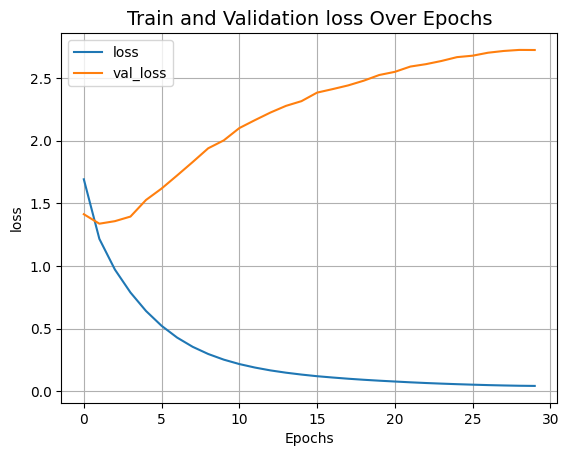

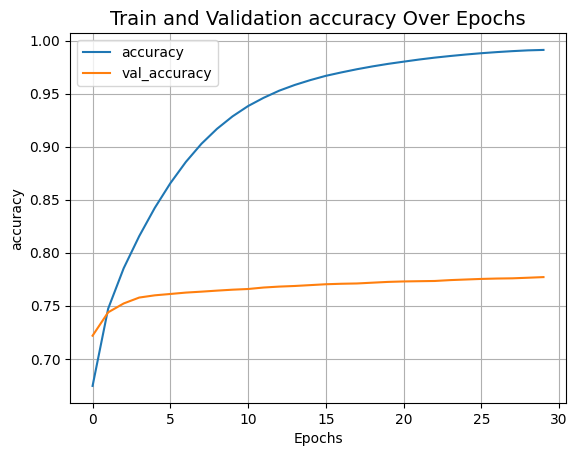

In [ ]:
### Visualize Loss and Accuracy over Epochs

def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_result("loss")
plot_result("accuracy")


In [ ]:
tuned_gpt2.summary()

Preprocessor: "gpt2_causal_lm_preprocessor"
__________________________________________________________________________________________________
 Tokenizer (type)                                    Vocab #     
 gpt2_tokenizer (GPT2Tokenizer)                      50257       
__________________________________________________________________________________________________
                                                                                                  
Model: "gpt2_causal_lm"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 padding_mask (InputLayer)      [(None, None)]       0           []                               
                                                                                                  
 token_ids (InputLayer)         [(None, None)]       0           []                               
        

In [ ]:
tf.keras.saving.save_model(tuned_gpt2, directory + '/699/699/model/gpt2.keras', overwrite=True, save_format='keras', include_optimizer=False)

In [ ]:
%%time
### Test Fine Tuned GPT2

test = test_df.combined[16][:500]
sample_output = """['first we feast', 'fwf', ..., 'bartender']"""
test_prompt = f"""You are a tags generator for a video.
Example output format: {sample_output}
Generate 10 tags for a video:
Video Description: {test}
Output:
"""

test_prompt = f"""
Video Description: {test}
"""

res = tuned_gpt2.generate(test_prompt, max_length=1024)
res.split('\n  Output: ')[1]

CPU times: user 1.6 s, sys: 13 ms, total: 1.61 s
Wall time: 1.59 s


"['packapuncher', 'fortnite', 'fortnite battle royale', 'live', 'stream', 'live stream', 'fortnite but', 'fortnite pack opening', 'pack', 'naomi', 'kaicenat', 'johnny', 'new', 'season', 'season 6', 'fortnite chapter 2 season 6', 'fortnite trailer', 'fortnite"

In [ ]:
### Define a function for bulk prediction

def gpt2_predict(combined):
  desc = combined[:500]
  prompt = f"""Video Description: {combined}"""
  try:
    output = tuned_gpt2.generate(prompt, max_length=1024)
  except UnicodeDecodeError:
    return ['no_tag']
  res = output.split('\n  Output: ')
  if len(res) == 1:
    return ['no_tag']
  else:
    return res[-1]



In [ ]:
%%time

test_df['gpt2'] = test_df['combined'].apply(gpt2_predict)

CPU times: user 2h 1min 54s, sys: 2min 20s, total: 2h 4min 14s
Wall time: 1h 55min 15s


In [ ]:
test_df[['top_tags','gpt2']]

,top_tags,gpt2
0,['kid cudi'],['kid cudi']
1,"['england', 'england vs. new zealand', 'new ze...","['england', 'england vs. new zealand', 'new ze..."
2,"['fortnite', 'fortnite battle royale', 'compet...","['sypherpk', 'sypherpk', 'fortnite', 'sypherpk..."
3,"['shorts', 'youtube shorts', 'tiktok', 'viral'...","['dub', 'dub team', 'nba 2k', 'basketball', 'n..."
4,"['first pregnancy', 'fertility', 'baby announc...","['family', 'shorts', 'shorts', 'shorts', 'lind..."
...,...,...
5494,"['emmanuel macron', 'guerre ukraine', 'informa...","['information', 'lci', 'russie', 'cartoon', 'a..."
5495,"['soolking', 'soolking officiel', 'soolking 20...","['soolking', 'jennifer', '"
5496,"['fox business', 'fox business live', 'fox bus...","['fox business', 'finance stock', 'stock marke..."
5497,"['spittin chiclets', 'chiclets', 'hockey', 'nh...","['spittin chiclets', 'barstool sports', 'mr be..."


In [ ]:
test_df[['top_tags','combined']]

,top_tags,combined
0,['kid cudi'],love.Provided to YouTube by Universal Music Gr...
1,"['england', 'england vs. new zealand', 'new ze...",Pope & Root Masterclass! | Highlights | Englan...
2,"['fortnite', 'fortnite battle royale', 'compet...",telling you the truth.this is the truth. ☂️ Sh...
3,"['shorts', 'youtube shorts', 'tiktok', 'viral'...",Basketball Mood Lifters! Part 7! 😆 #shortsBask...
4,"['first pregnancy', 'fertility', 'baby announc...",BRYNLEY IS PREGNANT!BRYNLEY IS PREGNANT!Subscr...
...,...,...
5494,"['emmanuel macron', 'guerre ukraine', 'informa...",Macron à Poutine : Tu te racontes des histoire...
5495,"['soolking', 'soolking officiel', 'soolking 20...","Soolking feat. Lynda, Heuss, L'Algérino, Frang..."
5496,"['fox business', 'fox business live', 'fox bus...",Trump delivers acceptance speech at the RNC | ...
5497,"['spittin chiclets', 'chiclets', 'hockey', 'nh...",Ryan Whitney & Paul Bissonnette Went Head To H...


In [ ]:
test_df.to_csv(directory + '/699/699/Data 20230612/Youtube/gpt2_results.csv')
test_df.to_csv(directory + '/699/699/Data 20230612/Youtube/gpt2_results.csv.backup')